# Цель занятия
На этом занятии мы рассмотрим особенности модели решающего дерева.

**Решающее дерево** - это алгоритм машинного обучения, который используется для решения задач классификации и регрессии. Оно представляет собой древовидную структуру, где каждый узел представляет тест на одном из признаков, а каждая ветвь - возможный результат этого теста. Листья дерева представляют собой конечный результат - прогноз для новых данных.

В процессе построения решающего дерева, алгоритм выбирает тест, который лучше всего разделяет данные на различные классы или предсказывает значение целевой переменной. Затем данные разбиваются на две или более частей в соответствии с результатами теста. Этот процесс повторяется для каждой полученной части, пока не будет достигнут критерий останова.


## Энтропия

Энтропийный критерий используется в машинном обучении для измерения неопределенности в наборе данных. Он основан на понятии энтропии из информационной теории.

Энтропия является мерой неопределенности. Чем выше энтропия, тем более неопределенным является набор данных. Для бинарной классификации, когда у нас есть два класса, энтропия может быть выражена следующей формулой:

$$H(p) = -p_1 \log_2(p_1) -p_2 \log_2(p_2)$$

где $p_1$ и $p_2$ - вероятности первого и второго классов соответственно.

Чтобы применить энтропийный критерий к дереву решений, мы вычисляем энтропию для каждого разбиения на признаке и выбираем разбиение с наименьшей энтропией. Чем меньше энтропия, тем более "чистым" является разбиение, то есть чем меньше неопределенности в подмножествах данных, полученных после разбиения.

## Критерий Джини

Критерий Джини (Gini impurity) также используется в деревьях решений для измерения неопределенности в наборе данных. Он вычисляет вероятность неправильной классификации случайно выбранного элемента, если он случайным образом принадлежит к одному из классов. Для бинарной классификации критерий Джини может быть выражен следующей формулой:

$$Gini(p) = 1 - (p_1^2 + p_2^2)$$

где $p_1$ и $p_2$ - вероятности первого и второго классов соответственно.

Для реализации критерия Джини в дереве решений, аналогично энтропийному критерию, необходимо выполнить следующие шаги:

1. Разделить данные по каждому признаку и вычислить критерий Джини для каждого разбиения, используя указанную формулу.

2. Вычислить улучшение (impurity reduction) для каждого разбиения. Улучшение показывает, насколько снизилась критерий Джини после разбиения и является разницей между критерием Джини до разбиения и суммой критериев Джини после разбиения.

3. Выбрать разбиение с наименьшим критерием Джини или наибольшим улучшением в зависимости от реализации алгоритма.

Для реализации энтропийного критерия в Python для вектора признаков, нам нужно вычислить энтропию для каждого разбиения и выбрать разбиение с наименьшей энтропией:

In [ ]:
import numpy as np

def entropy(y):
    """
    Вычисляет энтропию вектора y со значениями дискретных переменных.
    Аргументы:
    - y: вектор numpy с дискретными значениями.
    Возвращает:
    - entropy: значение энтропии типа float.
    """
    # Подсчитываем количество каждого уникального значения в y.
    _, counts = np.unique(y, return_counts=True)
    # Вычисляем вероятность каждого уникального значения.
    probs = counts / len(y)
    # Вычисляем значение энтропии.
    return -np.sum(probs * np.log2(probs))

def find_best_split_entropy(X, y):
    """
    Находит лучшее разбиение для вектора признаков X и вектора целевой переменной y, используя критерий энтропии.
    Аргументы:
    - X: вектор numpy с вещественными значениями признаков.
    - y: вектор numpy с дискретными значениями целевой переменной.

    Возвращает:
    - best_feature: индекс признака, по которому было найдено лучшее разбиение.
    - best_threshold: значение порога, по которому было найдено лучшее разбиение.
    - best_gain: значение критерия энтропии для лучшего разбиения.
    """
    best_feature, best_threshold, best_gain = None, None, 0
    # Итерируемся по всем признакам.
    for feature in range(X.shape[1]):
        # Находим уникальные значения признака.
        thresholds = np.unique(X[:, feature])
        # Итерируемся по всем возможным пороговым значениям признака.
        for threshold in thresholds:
            # Определяем индексы объектов, которые относятся к левому поддереву и правому поддереву.
            left_indices = X[:, feature] <= threshold
            right_indices = X[:, feature] > threshold
            # Пропускаем текущую итерацию, если не найдены объекты, которые относятся к левому или правому поддереву.
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            # Определяем вектор целевой переменной для объектов, которые относятся к левому и правому поддереву.
            left_y, right_y = y[left_indices], y[right_indices]
            # Вычисляем значение критерия энтропии для текущего разбиения.
            gain = entropy(y) - (len(left_y) / len(y)) * entropy(left_y) - (len(right_y) / len(y)) * entropy(right_y)
            # Обновляем значения лучшего разбиения, если найдено разбиение с большим значением
            if gain > best_gain:
                best_feature, best_threshold, best_gain = feature, threshold, gain
    return best_feature, best_threshold, best_gain


In [ ]:
X = np.array([[2, 4], [2, 6], [2, 8], [4, 10], [6, 10], [8, 8], [8, 6], [8, 4],
     [6, 6], [6, 4], [10, 2], [6, 8], [7.683182774875691, 2.0378865840698976], [12, 4], [12, 6], [12, 8]])
y = np.array(np.array([0]*8 + [1]*8))
best_feature, best_threshold, best_gain = find_best_split_entropy(X, y)
print("Best feature:", best_feature)
print("Best threshold:", best_threshold)
print("Best gain:", best_gain)

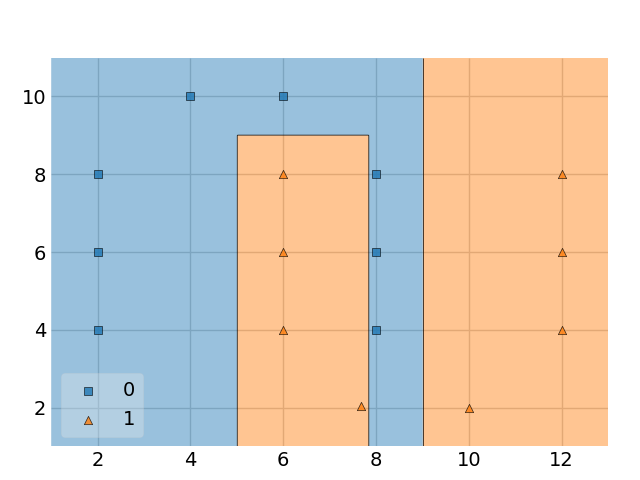

## Критерий MSE

MSE (Mean Squared Error) используется в машинном обучении для измерения среднеквадратичной ошибки модели. Он является одним из критериев оценки качества модели.

MSE вычисляется путем суммирования квадратов разностей между предсказанными значениями модели и фактическими значениями и деления этой суммы на количество наблюдений:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

где $y_i$ - фактическое значение, $\hat{y_i}$ - предсказанное значение модели, а $n$ - количество наблюдений.

Чтобы применить MSE в задаче регрессии, мы минимизируем этот критерий при обучении модели. Меньшее значение MSE указывает на более точные предсказания модели и более близкие к фактическим значениям целевой переменной.

MSE (Mean Squared Error) выражается как сумма дисперсии и смещения модели:

$
\text{MSE} = \text{Bias}^2 + \text{Variance} + \text{Error}
$

где:

- Bias (смещение) отражает разницу между средним значением прогнозов модели и истинным средним значением целевой переменной.

- Variance (дисперсия) является мерой разброса данных относительно их среднего значения.

- Error представляет собой невоспроизводимую случайную составляющую данных.

Цель состоит в том, чтобы найти баланс между смещением и дисперсией для достижения наилучшей модели, минимизируя MSE.

Таким образом, при использовании MSE в деревьях решений или других моделях регрессии, мы стремимся выбрать разбиения, которые минимизируют среднеквадратичную ошибку, чтобы получить наилучшую модель с наименьшими отклонениями от фактических значений.

## Базовое дерево

In [ ]:
class BasicTree:

    def __init__(self):
        raise NotImplementedError("Метод требует переопределения в классе наследования")

    @staticmethod
    def find_best_split_entropy(X, y):
        """
        Находит лучшее разбиение для вектора признаков X и вектора целевой переменной y, используя критерий энтропии.
        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.
        - y: вектор numpy с дискретными значениями целевой переменной.

        Возвращает:
        - best_feature: индекс признака, по которому было найдено лучшее разбиение.
        - best_threshold: значение порога, по которому было найдено лучшее разбиение.
        - best_gain: значение критерия энтропии для лучшего разбиения.
        """
        def entropy(y):
            """
            Вычисляет энтропию вектора y со значениями дискретных переменных.
            Аргументы:
            - y: вектор numpy с дискретными значениями.
            Возвращает:
            - entropy: значение энтропии типа float.
            """
            # Подсчитываем количество каждого уникального значения в y.
            _, counts = np.unique(y, return_counts=True)
            # Вычисляем вероятность каждого уникального значения.
            probs = counts / len(y)
            # Вычисляем значение энтропии.
            return -np.sum(probs * np.log2(probs))

        best_feature, best_threshold, best_gain = None, None, 0
        # Итерируемся по всем признакам.
        for feature in range(X.shape[1]):
            # Находим уникальные значения признака.
            thresholds = np.unique(X[:, feature])
            # Итерируемся по всем возможным пороговым значениям признака.
            for threshold in thresholds:
                # Определяем индексы объектов, которые относятся к левому поддереву и правому поддереву.
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold
                # Пропускаем текущую итерацию, если не найдены объекты, которые относятся к левому или правому поддереву.
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                # Определяем вектор целевой переменной для объектов, которые относятся к левому и правому поддереву.
                left_y, right_y = y[left_indices], y[right_indices]
                # Вычисляем значение критерия энтропии для текущего разбиения.
                gain = entropy(y) - (len(left_y) / len(y)) * entropy(left_y) \
                                       - (len(right_y) / len(y)) * entropy(right_y)
                # Обновляем значения лучшего разбиения, если найдено разбиение с большим значением
                if gain > best_gain:
                    best_feature, best_threshold, best_gain = feature, threshold, gain
        return best_feature, best_threshold, best_gain


    @staticmethod
    def find_best_split_mse(X, y):
        """
        Находит лучшее разбиение для вектора признаков X и вектора целевой переменной y,
        используя критерий среднеквадратичной ошибки (MSE).

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.
        - y: вектор numpy с вещественными значениями целевой переменной.

        Возвращает:
        - best_feature: индекс признака, по которому было найдено лучшее разбиение.
        - best_threshold: значение порога, по которому было найдено лучшее разбиение.
        - best_mse: значение критерия среднеквадратичной ошибки для лучшего разбиения.
        """
        best_feature, best_threshold, best_mse = None, None, float('inf')
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                left_y, right_y = y[left_indices], y[right_indices]
                mse = np.mean((left_y - np.mean(left_y))**2) + np.mean((right_y - np.mean(right_y))**2)
                if mse < best_mse:
                    best_feature, best_threshold, best_mse = feature, threshold, mse
        return best_feature, best_threshold, best_mse

    def fit(self, X, y, y_pred=None):
        """
        Обучает дерево регрессии на обучающих данных X и y.

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.
        - y: вектор numpy с вещественными значениями целевой переменной.
        - y_pred (опционально): вектор numpy с вещественными значениями предсказаний (для Gradient boosting)
        """
        if y_pred is not None:
            self.tree = self._build_tree(X, y, depth=0, y_pred=y_pred)
        else:
            self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        """
        Выполняет предсказание для входных данных X.

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.

        Возвращает:
        - predictions: вектор numpy с предсказанными вещественными значениями.
        """
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _build_tree(self, X, y, depth, y_pred=None):
        """
        Рекурсивно строит дерево регрессии, используя входные данные X и y.

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.
        - y: вектор numpy с вещественными значениями целевой переменной.
        - y_pred (опционально): вектор numpy с вещественными значениями предсказаний (для Gradient boosting)
        - depth: текущая глубина дерева.

        Возвращает:
        - node: словарь, представляющий узел дерева.

        """
        # Проверка условий останова по максимальной глубине и другим критериям
        if self.max_depth is not None and depth >= self.max_depth:
            # Создание листового узла
            return self._create_leaf_node(y, y_pred)

        # Нахождение лучшего разбиения по критерию энтропии
        if self.criterion == "entropy":
            best_feature, best_threshold, _ = self.find_best_split_entropy(X, y)

        # Нахождение лучшего разбиения по критерию mse
        elif self.criterion == "mse":
            best_feature, best_threshold, _ = self.find_best_split_mse(X, y)

        else:
            raise Exception('Следует задать критерий разбиения из списка ["mse", "entropy"]')

        # Проверка условия останова, если не удалось найти лучшее разбиение
        if best_feature is None or best_threshold is None:
            # Создание листового узла
            if y_pred is not None:
                return self._create_leaf_node(y, y_pred)
            return self._create_leaf_node(y)

        # Разделение данных на левое и правое поддеревья
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        # Рекурсивное построение левого и правого поддеревьев
        if y_pred is not None:
            left_tree = self._build_tree(X[left_indices], y[left_indices], y_pred[left_indices], depth + 1)
            right_tree = self._build_tree(X[right_indices], y[right_indices], y_pred[right_indices], depth + 1)
        else:
            left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
            right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        # Создание узла с информацией о лучшем разбиении
        node = {'feature': best_feature, 'threshold': best_threshold,
                'left': left_tree, 'right': right_tree}

        return node


    def _create_leaf_node(self, y, y_pred=None):
        raise NotImplementedError("Метод требует переопределения в классе наследования")


    def _traverse_tree(self, x, node):
        """
        Обходит дерево регрессии для выполнения предсказания на входных данных x.

        Аргументы:
        - x: вектор numpy с вещественными значениями признаков.
        - node: текущий узел дерева.

        Возвращает:
        - value: предсказанное вещественное значение.
        """
        if 'value' in node:
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._traverse_tree(x, node['left'])
        else:
            return self._traverse_tree(x, node['right'])


## Дерево для регрессии

In [ ]:
class RegressionTree(BasicTree):
    def __init__(self, max_depth=None, criterion="mse"):
        """
        Инициализирует объект RegressionTree.

        Аргументы:
        - max_depth: максимальная глубина дерева (опционально).
        Если значение None, то дерево будет строиться без ограничения глубины.
        - criterion: выбор способа разбиений деревьев. Выбирается из списка:
        ["mse", "entropy", "gini"]
        """
        self.max_depth = max_depth
        self.criterion = criterion
        self.tree = None


    def _create_leaf_node(self, y, y_pred=None):
        """
        Создает листовой узел дерева регрессии.

        Аргументы:
        - y: вектор numpy с вещественными значениями целевой переменной.

        Возвращает:
        - node: словарь, представляющий листовой узел среднего значения целевой переменной.
        """
        return {'value': np.mean(y)}

In [ ]:
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y_train = np.array([1, 2, 3, 4])

regressor = RegressionTree(max_depth=3)
regressor.fit(X_train, y_train)

X_test = np.array([[2, 3], [6, 7]])
y_test = regressor.predict(X_test)

print(y_test)

In [ ]:
import matplotlib.pyplot as plt

# Визуализация обучающих данных
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training Data')

# Визуализация предсказанных значений
plt.scatter(X_test[:, 0], y_test, color='red', label='Predicted Values')

# Добавление линии предсказанных значений
plt.plot(X_test[:, 0], y_test, color='red', linestyle='--')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz
import pydotplus

X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y_train = np.array([1, 2, 3, 4])

regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)

X_test = np.array([[2, 3], [6, 7]])
y_test = regressor.predict(X_test)

print(y_test)

In [ ]:
import matplotlib.pyplot as plt

# Визуализация обучающих данных
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training Data')

# Визуализация предсказанных значений
plt.scatter(X_test[:, 0], y_test, color='red', label='Predicted Values')

# Добавление линии предсказанных значений
plt.plot(X_test[:, 0], y_test, color='red', linestyle='--')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
dot_data = tree.export_graphviz(regressor, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graphviz.Source(graph.to_string())

## Дерево для классификации

In [ ]:
class ClassificationTree(BasicTree):
    def __init__(self, max_depth=None, criterion="entropy"):
        """
        Инициализирует объект RegressionTree.

        Аргументы:
        - max_depth: максимальная глубина дерева (опционально).
        Если значение None, то дерево будет строиться без ограничения глубины.
        - criterion: выбор способа разбиений деревьев. Выбирается из списка:
        ["mse", "entropy", "gini"]
        """
        self.max_depth = max_depth
        self.criterion = criterion
        self.tree = None


    def _create_leaf_node(self, y):
        """
        Создает листовой узел дерева классификации.

        Аргументы:
        - y: вектор numpy с дискретными значениями целевой переменной.

        Возвращает:
        - node: словарь, представляющий листовой узел с наиболее часто встречающимся значением целевой переменной.
        """
        unique_classes, counts = np.unique(y, return_counts=True)
        most_common_class = unique_classes[np.argmax(counts)]
        return {'value': most_common_class}

In [ ]:
# Создание и обучение дерева классификации
X_train = np.array([[1.2, 2.4], [0.5, 1.8], [3.1, 2.9], [2.0, 1.5]])
y_train = np.array([0, 0, 1, 1])

clf = ClassificationTree(max_depth=2)
clf.fit(X_train, y_train)

# Предсказание классов для новых данных
X_test = np.array([[1.0, 2.0], [2.5, 1.7]])
y_test = clf.predict(X_test)

# Вывод предсказанных классов
for i, x in enumerate(X_test):
    print(f"Пример {i+1}: {x} -> Класс: {y_test[i]}")


In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, clf=clf, legend=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import pydotplus

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

y_test = classifier.predict(X_test)

print(y_test)

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graphviz.Source(graph.to_string())

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, clf=classifier, legend=3)

## Сравнение решающего дерева и линейной модели

- Линейные модели могут работать лучше на линейно разделимых данных

- При сложных нелинейных зависимостях решающее дерево может работать лучше

In [ ]:
"""
Импорт необходимых библиотек:

"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

In [ ]:
"""
Генерация искусственного набора данных:
"""
seed = 1
np.random.seed(seed)
n = 1000
data = np.zeros(shape=(n, 2))
data[:, 0] = np.linspace(-5, 5, n)
data[:, 1] = data[:, 0] + 0.5 * np.random.normal(size=n)
target = (data[:, 1] > data[:, 0]).astype(int)
plt.scatter(data[:, 0], data[:, 1], s=100, c=target)
plt.show()

In [ ]:
"""
Разделение набора данных на обучающую и тестовую выборки:

"""

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=seed)

In [ ]:
"""
Создание объекта линейного классификатора и обучение его на обучающей выборке:
"""
linear_classifier = LogisticRegression(random_state=seed)
linear_classifier.fit(X_train, y_train)

"""
Получение прогнозов на тестовой выборке и оценка точности классификатора:
"""
y_pred_linear = linear_classifier.predict(X_test)
print('f1_score_linear:', f1_score(y_test, y_pred_linear))

In [ ]:
"""
Визуализация разделяющей поверхности линейного классификатора
"""
plot_decision_regions(X_test, y_test, linear_classifier)
plt.show()

In [ ]:
"""
Создание объекта дерева и обучение его на обучающей выборке:
"""
tree_classifier = DecisionTreeClassifier(random_state=seed)
tree_classifier.fit(X_train, y_train)

"""
Получение прогнозов на тестовой выборке и оценка точности дерева:
"""
y_pred_tree = tree_classifier.predict(X_test)
print('f1_score_tree:', f1_score(y_test, y_pred_tree))

In [ ]:
"""
Визуализация разделяющей поверхности дерева
"""
plot_decision_regions(X_test, y_test, tree_classifier)
plt.show()

## Бэггинг для регрессии

In [ ]:
import numpy as np

class BaggingRegressor:
    def __init__(self, n_estimators=10, max_depth=None):
        """
        Конструктор класса BaggingRegressor.

        Аргументы:
        - n_estimators: количество базовых моделей (деревьев).
        - max_depth: максимальная глубина деревьев.

        Переменные экземпляра:
        - n_estimators: количество базовых моделей (деревьев).
        - max_depth: максимальная глубина деревьев.
        - estimators: список базовых моделей (деревьев).
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.estimators = []

    def fit(self, X, y):
        """
        Обучает модель на данных X и y.

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.
        - y: вектор numpy с вещественными значениями целевой переменной.
        """
        for _ in range(self.n_estimators):
            # Создание и обучение экземпляра RegressionTree
            estimator = RegressionTree(max_depth=self.max_depth)
            indices = np.random.choice(len(X), size=len(X), replace=True)
            X_sampled = X[indices]
            y_sampled = y[indices]
            estimator.fit(X_sampled, y_sampled)
            self.estimators.append(estimator)

    def predict(self, X):
        """
        Прогнозирует значения для новых данных X.

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.

        Возвращает:
        - predictions: вектор numpy с прогнозируемыми значениями.
        """
        predictions = np.zeros(len(X))
        for estimator in self.estimators:
            predictions += estimator.predict(X)
        return predictions / len(self.estimators)

In [ ]:
np.random.seed(42)
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y_train = np.array([1, 2, 3, 4])

bagging_regressor = BaggingRegressor(n_estimators=5, max_depth=3)
bagging_regressor.fit(X_train, y_train)

X_test = np.array([[2, 3], [6, 7]])
y_test = bagging_regressor.predict(X_test)

print(y_test)

In [ ]:
import matplotlib.pyplot as plt

# Визуализация обучающих данных
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training Data')

# Визуализация предсказанных значений
plt.scatter(X_test[:, 0], y_test, color='red', label='Predicted Values')

# Добавление линии предсказанных значений
plt.plot(X_test[:, 0], y_test, color='red', linestyle='--')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import BaggingRegressor

# Определение базового оценщика (решающего дерева регрессии)
base_estimator = DecisionTreeRegressor(random_state=42)

# Определение бэггинг-регрессора
bagging = BaggingRegressor(estimator=base_estimator, n_estimators=5, random_state=42)

bagging.fit(X_train, y_train)

y_test = bagging.predict(X_test)
print(y_test)

In [ ]:
import matplotlib.pyplot as plt

# Визуализация обучающих данных
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training Data')

# Визуализация предсказанных значений
plt.scatter(X_test[:, 0], y_test, color='red', label='Predicted Values')

# Добавление линии предсказанных значений
plt.plot(X_test[:, 0], y_test, color='red', linestyle='--')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Бэггинг для классификации

In [ ]:
import numpy as np

class BaggingClassifier:
    def __init__(self, n_estimators=10, max_depth=None):
        """
        Конструктор класса BaggingClassifier.

        Аргументы:
        - n_estimators: количество базовых моделей (деревьев).
        - max_depth: максимальная глубина деревьев.

        Переменные экземпляра:
        - n_estimators: количество базовых моделей (деревьев).
        - max_depth: максимальная глубина деревьев.
        - estimators: список базовых моделей (деревьев).
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.estimators = []

    def fit(self, X, y):
        """
        Обучает модель на данных X и y.

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.
        - y: вектор numpy с дискретными значениями целевой переменной.
        """
        for _ in range(self.n_estimators):
            # Создание и обучение экземпляра ClassificationTree
            estimator = ClassificationTree(max_depth=self.max_depth)
            indices = np.random.choice(len(X), size=len(X), replace=True)
            X_sampled = X[indices]
            y_sampled = y[indices]
            estimator.fit(X_sampled, y_sampled)
            self.estimators.append(estimator)

    def predict(self, X):
        """
        Прогнозирует значения классов для новых данных X.

        Аргументы:
        - X: вектор numpy с вещественными значениями признаков.

        Возвращает:
        - predictions: вектор numpy с прогнозируемыми значениями классов.
        """
        predictions = np.zeros(len(X))
        for estimator in self.estimators:
            predictions += estimator.predict(X)
        return np.round(predictions / len(self.estimators))

In [ ]:
# Создание и обучение бэггинга для классификации
X_train = np.array([[1.2, 2.4], [0.5, 1.8], [3.1, 2.9], [2.0, 1.5]])
y_train = np.array([0, 0, 1, 1])

bagging_model = BaggingClassifier(n_estimators=5, max_depth=3)
bagging_model.fit(X_train, y_train)

# Предсказание классов для новых данных
X_test = np.array([[1.0, 2.0], [2.5, 1.7]])
y_test = bagging_model.predict(X_test)

# Вывод предсказанных классов
for i, x in enumerate(X_test):
    print(f"Пример {i+1}: {x} -> Класс: {y_test[i]}")

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, clf=bagging_model, legend=3)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Создание и обучение бэггинга для классификации
X_train = np.array([[1.2, 2.4], [0.5, 1.8], [3.1, 2.9], [2.0, 1.5]])
y_train = np.array([0, 0, 1, 1])

# Создание и обучение BaggingClassifier с базовой моделью DecisionTreeClassifier
base_model = DecisionTreeClassifier(max_depth=3)
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Прогнозирование классов на тестовой выборке
y_pred = bagging_model.predict(X_test)

# Предсказание классов для новых данных
X_test = np.array([[1.0, 2.0], [2.5, 1.7]])
y_test = bagging_model.predict(X_test)

# Вывод предсказанных классов
for i, x in enumerate(X_test):
    print(f"Пример {i+1}: {x} -> Класс: {y_test[i]}")

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, clf=bagging_model, legend=3)

## Случайный лес для регрессии

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y_train = np.array([1, 2, 3, 4])


print(y_test)

# Создание и обучение модели случайного леса
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

X_test = np.array([[2, 3], [6, 7]])
y_test = model.predict(X_test)

# Прогнозирование на тестовом наборе данных
y_pred = model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

# Визуализация обучающих данных
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training Data')

# Визуализация предсказанных значений
plt.scatter(X_test[:, 0], y_test, color='red', label='Predicted Values')

# Добавление линии предсказанных значений
plt.plot(X_test[:, 0], y_test, color='red', linestyle='--')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Случайный лес для классификации

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Создание и обучение случайного леса для классификации
X_train = np.array([[1.2, 2.4], [0.5, 1.8], [3.1, 2.9], [2.0, 1.5]])
y_train = np.array([0, 0, 1, 1])

# Создание и обучение модели случайного леса
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

# Прогнозирование классов для тестовых данных
y_pred = clf.predict(X_test)

# Предсказание классов для новых данных
X_test = np.array([[1.0, 2.0], [2.5, 1.7]])
y_test = clf.predict(X_test)

# Вывод предсказанных классов
for i, x in enumerate(X_test):
    print(f"Пример {i+1}: {x} -> Класс: {y_test[i]}")

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, clf=clf, legend=3)

**Концепция "out-of-bag"**

Концепция "out-of-bag" (OOB) оценки является частью алгоритма случайного леса (random forest) и позволяет оценивать производительность модели без необходимости в отдельном наборе данных для валидации.

При построении каждого дерева в случайном лесу, используется только подмножество обучающих данных, которое выбирается случайным образом с возвращением. Это означает, что некоторые образцы данных не попадают в выборку для обучения данного дерева.

OOB-оценка использует эти образцы, которые не были включены в обучение конкретного дерева, для оценки его производительности. Каждый образец может быть классифицирован с использованием всех деревьев, которые не включали этот образец в свою обучающую выборку.

Процесс оценки out-of-bag состоит из следующих шагов:
1. Для каждого образца данных из обучающей выборки, который не был использован для обучения конкретного дерева, происходит классификация с использованием всех деревьев, которые не содержали этот образец в своей обучающей выборке.
2. Прогнозы каждого дерева усредняются или голосуют для получения итогового прогноза для данного образца.
3. Используя истинные метки классов для образцов, которые не были использованы для обучения дерева, оценивается производительность дерева путем сравнения его прогнозов с истинными метками классов.

Итоговая оценка out-of-bag является усредненной оценкой производительности каждого дерева на его соответствующем наборе out-of-bag образцов. Эта оценка может служить в качестве приближенной оценки производительности модели на новых данных, поскольку она использует образцы, которые не были включены в обучение каждого отдельного дерева.

OOB-оценка предоставляет удобный способ оценки модели без необходимости валидационного набора данных и может быть полезна для выбора оптимального числа деревьев в случайном лесу или для сравнения различных моделей случайного леса.

Оценка out-of-bag точности не всегда является точной оценкой производительности модели и может быть несколько смещенной. Для получения более точной оценки производительности модели рекомендуется использовать кросс-валидацию или отдельный набор данных для валидации.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Генерация датасета
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Инициализация модели
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Обучение модели
rf.fit(X, y)

# out-of-bag (accuracy)
oob_score = rf.oob_score_
print("Out-of-Bag Score:", oob_score)

# Упражнение

Достаточно лёгкая задача на понимание работы простых деревьев решений. Задание на устойчивость обычного дерева.

Как будет меняться построение (структура) простого дерева, если каждый раз оно будет строиться на разных частях данных? Разные подвыборки одной выборки.

Подберите такое число (величина подвыборки), чтобы построение дерево не менялось. Или менялось, но слабо. Да и просто поиграйте с числами, чтобы почувствовать алгоритм.

In [ ]:
# генерируем наши данные

np.random.seed(999)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.31
X[50:, :] -= 0.31
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

In [ ]:
# построение дерева для разных подвыборок

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        tree = DecisionTreeClassifier(random_state=999)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.5 * len(X))) # здесь
        X_part, y_part = X[idx_part, :], y[idx_part]
        tree.fit(X_part, y_part)
        ax[i][j].set_title("sample #{}".format(seed_idx))
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, tree, ax=ax[i][j])

plt.show()